In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지를 무시



In [2]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'



In [3]:
hospital_df = pd.read_csv('data/1.병원정보서비스-2025.3.csv')
hospital_df.head()

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzIxIyQxIy...,(VOM)봄안과의원,31,의원,230000,대구,230002,대구동구,율하동,41151,...,0,0,0,0,0,0,0,0,128.691894,35.869852
1,JDQ4MTAxMiM1MSMkMSMkMCMkOTkkNTgxOTYxIzExIyQxIy...,(복지)예사랑병원,29,정신병원,210000,부산,210006,부산서구,아미동2가,49249,...,0,0,0,0,0,0,0,0,129.013310,35.097325
2,JDQ4MTYyMiM4MSMkMiMkMCMkMDAkNDgxOTYxIzUxIyQxIy...,(사) 경찰공제회 포항의원,31,의원,370000,경북,370701,포항남구,오천읍,37895,...,0,0,0,0,0,0,0,0,129.392904,35.942317
3,JDU4MTI3MSM1MSMkMiMkMCMkMDAkNDgxOTYxIzIxIyQxIy...,(사)경찰공제회남부의원,31,의원,220000,인천,220006,인천남동구,고잔동,21689,...,0,0,0,0,0,0,0,0,126.708861,37.384910
4,JDQ4MTYyMiM1MSMkMiMkMCMkMDAkMzgxMzUxIzQxIyQxIy...,(사)대한결핵협회경기도지부부설복십자의원,31,의원,310000,경기,310603,수원팔달구,매산로3가,16456,...,0,0,0,0,0,0,0,0,127.008966,37.271984


In [4]:
# 필요한 세 개의 컬럼만 추출
hospitals_simple = hospital_df[["요양기관명", "종별코드명", "시도코드명", "좌표(X)", "좌표(Y)"]]

# 중복 제거 후 출력
hospitals_simple_unique = hospitals_simple.drop_duplicates()

hospitals_simple_unique.describe()


,좌표(X),좌표(Y)
count,77036.000000,77036.000000
mean,127.473033,36.656148
std,0.832771,1.046182
min,124.664719,33.116522
25%,126.916863,35.824707
50%,127.085282,37.267486
75%,128.003963,37.517127
max,130.908437,38.538992


In [5]:
# '종별코드명'에서 '정신'이 포함된 의료기관만 필터링
hospitals_simple_unique = hospitals_simple[hospital_df['종별코드명'].str.contains("정신", na=False)]

hospitals_simple_unique.describe()


,좌표(X),좌표(Y)
count,260.000000,260.000000
mean,127.728179,36.333108
std,0.898054,1.013857
min,126.358645,33.461217
25%,126.948558,35.354580
50%,127.414284,36.270413
75%,128.599744,37.392276
max,129.391175,37.900056


In [6]:
hospitals_simple_unique.to_csv("hospitals_simple_unique.csv", index=False, encoding="utf-8-sig")

In [7]:
# '종별코드명'에서 '정신'이 포함된 의료기관만 필터링
mental_hospitals = hospitals_simple[hospital_df['요양기관명'].str.contains("정신", na=False)]

mental_hospitals.describe()

,좌표(X),좌표(Y)
count,1686.000000,1686.000000
mean,127.405565,36.767576
std,0.781074,1.015608
min,126.264136,33.247812
25%,126.934877,35.863253
50%,127.063263,37.394130
75%,127.435306,37.522359
max,129.363754,37.892772


In [8]:
# 시도별 정신병원 수 세기
mental_hospital_counts = mental_hospitals["시도코드명"].value_counts().reset_index()
mental_hospital_counts.columns = ["시도", "정신병원_개수"]

# 가나다순 정렬
mental_hospital_counts = mental_hospital_counts.sort_values(by="시도").reset_index(drop=True)

mental_hospital_counts


,시도,정신병원_개수
0,강원,24
1,경기,371
2,경남,64
3,경북,33
4,광주,50
5,대구,89
6,대전,74
7,부산,153
8,서울,633
9,세종시,15


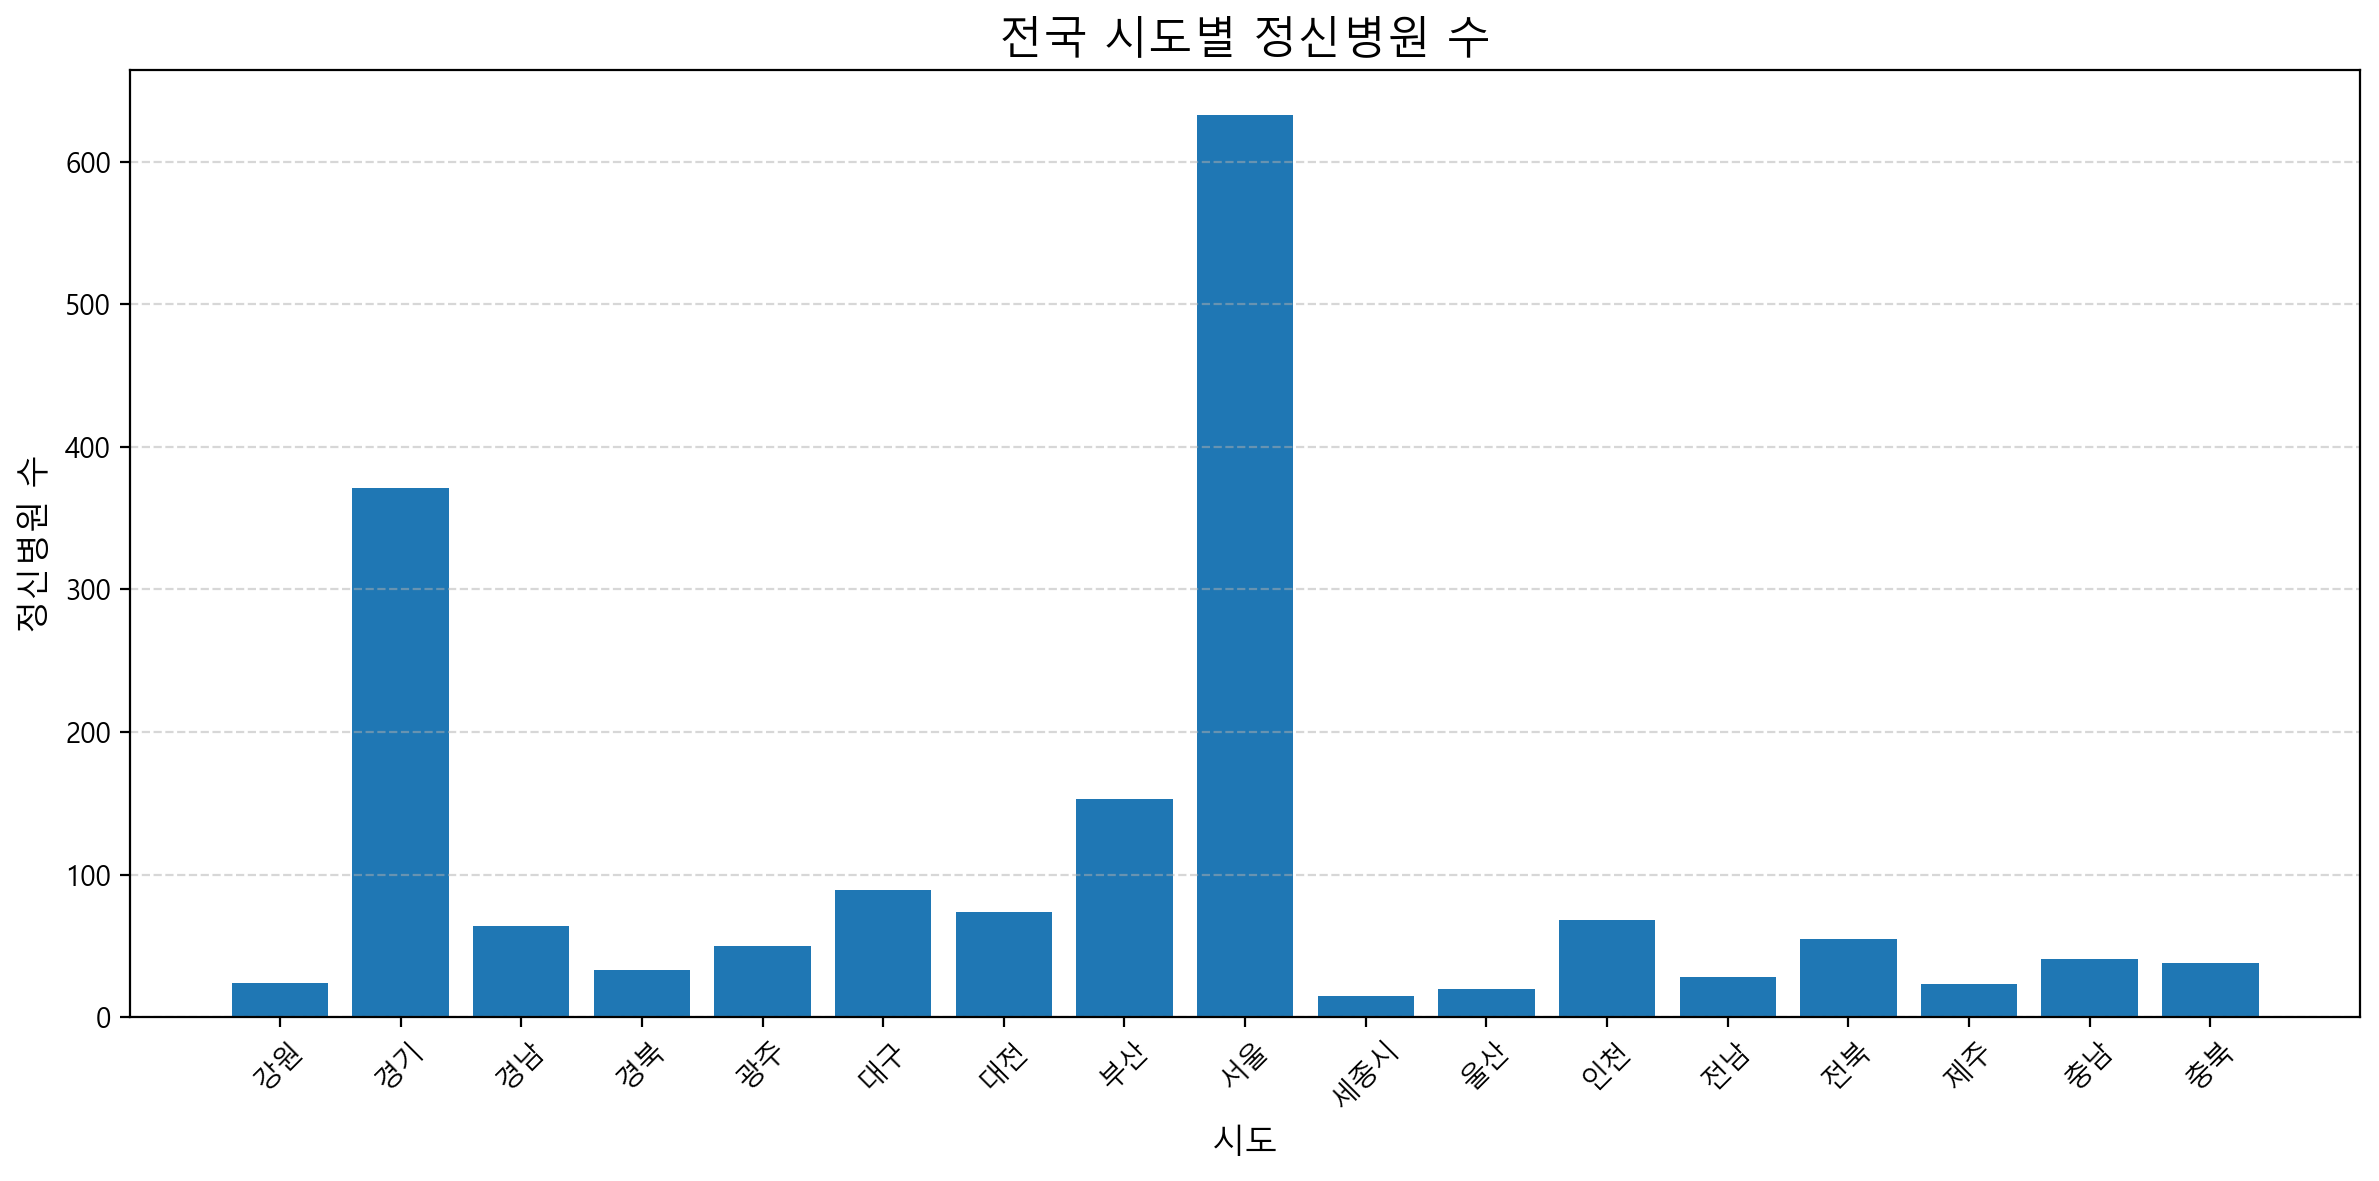

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(mental_hospital_counts["시도"], mental_hospital_counts["정신병원_개수"])

plt.title("전국 시도별 정신병원 수", fontsize=16)
plt.xlabel("시도", fontsize=12)
plt.ylabel("정신병원 수", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


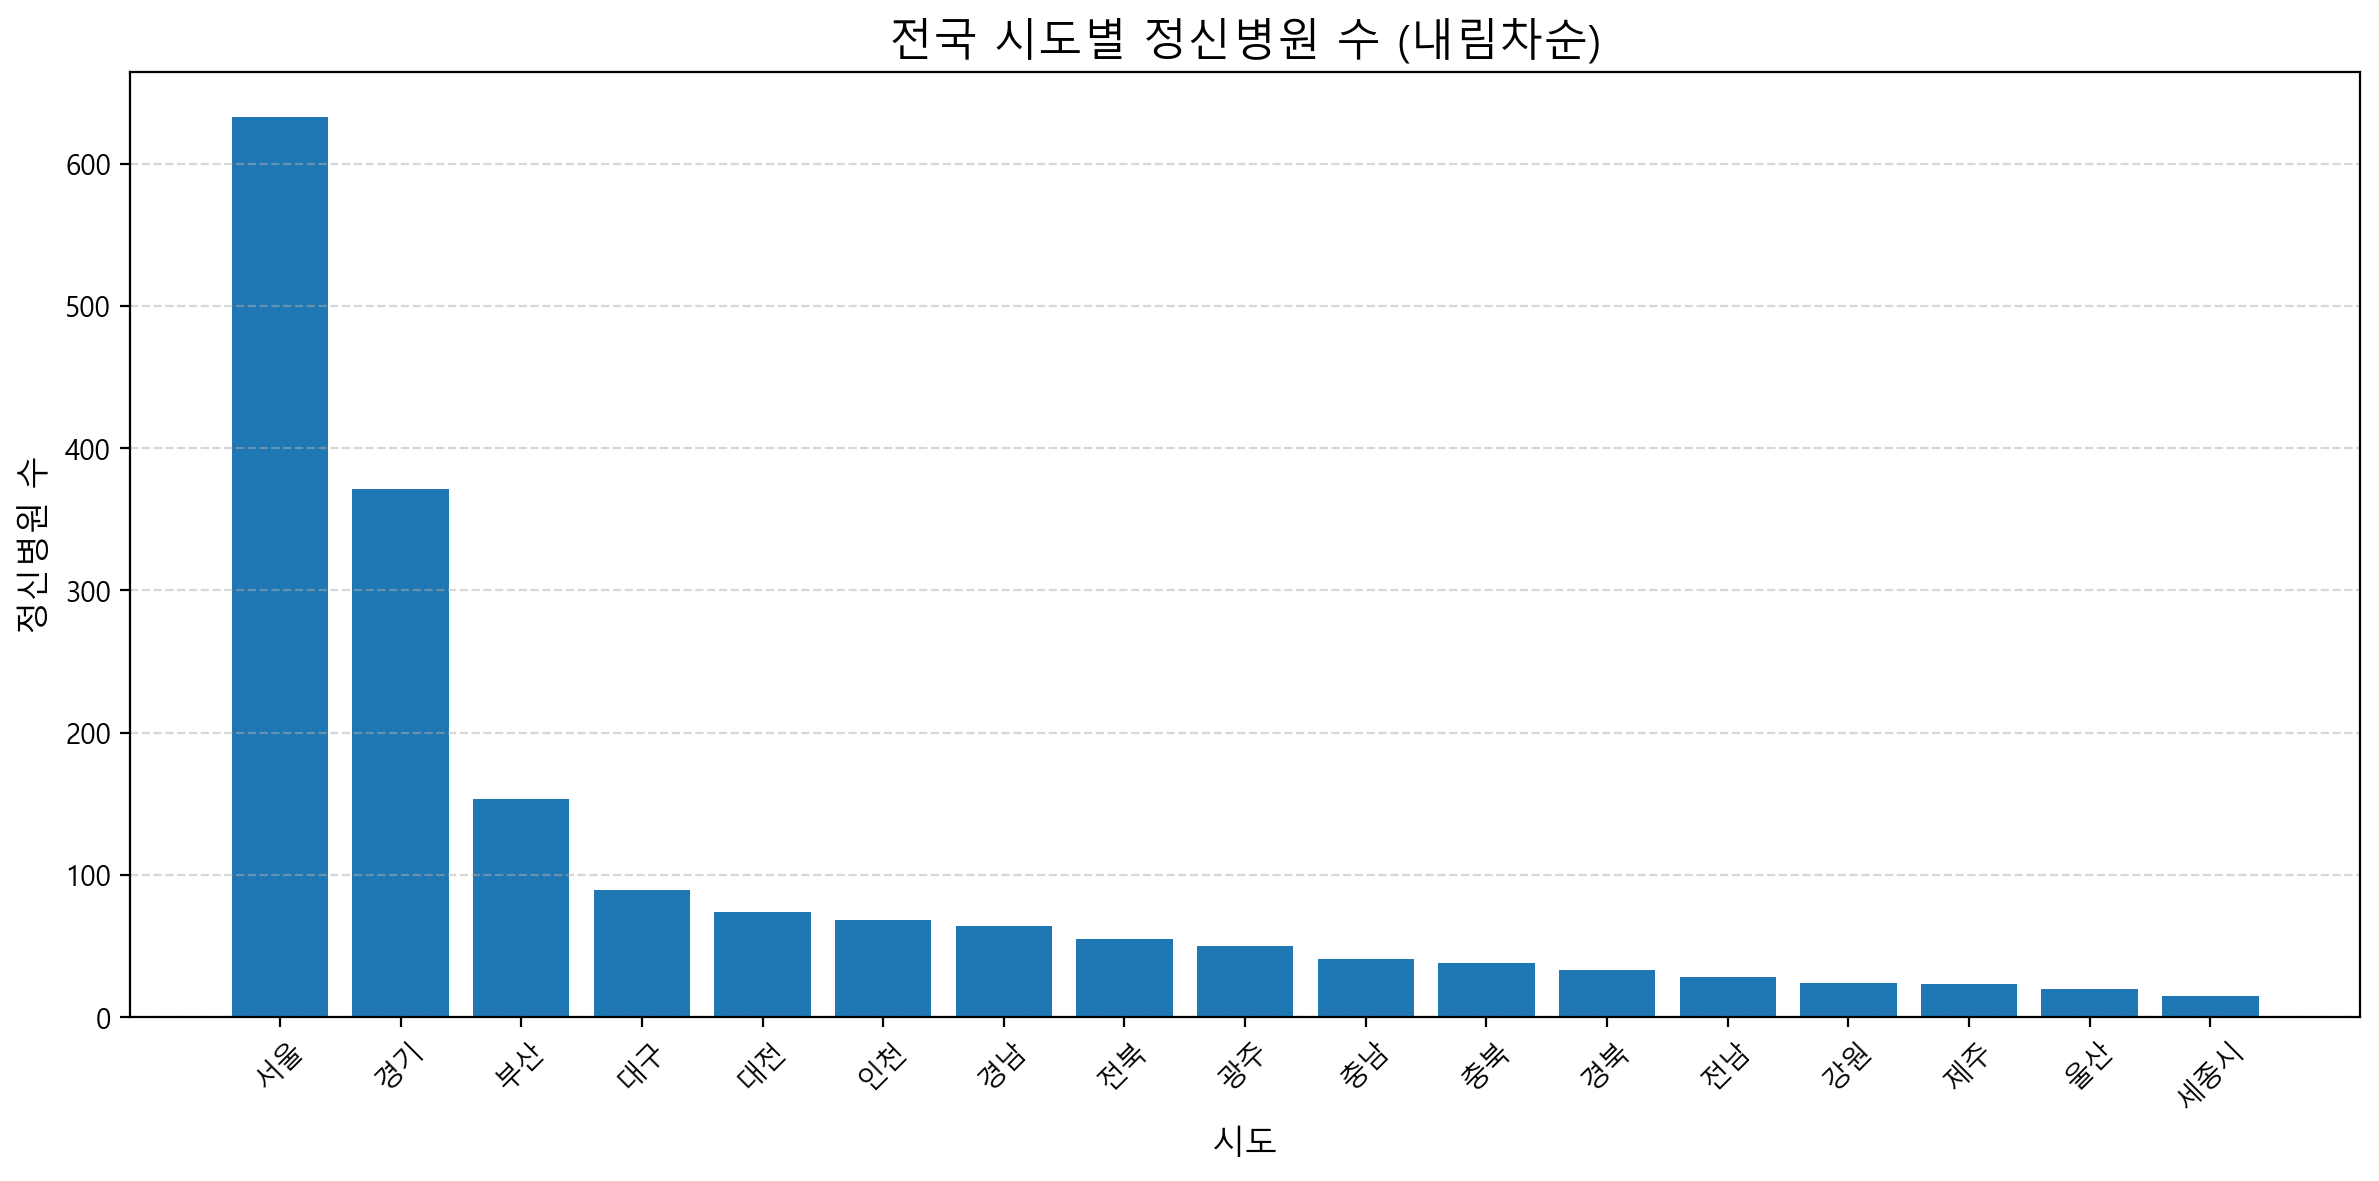

In [10]:
# 정신병원 수가 많은 순으로 정렬
sorted_hospital_counts = mental_hospital_counts.sort_values(by="정신병원_개수", ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(sorted_hospital_counts["시도"], sorted_hospital_counts["정신병원_개수"])

plt.title("전국 시도별 정신병원 수 (내림차순)", fontsize=16)
plt.xlabel("시도", fontsize=12)
plt.ylabel("정신병원 수", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
